## Zadanie 1

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

In [21]:
library("tidyverse")

In [8]:
setwd("C:/Users/macie/OneDrive/Pulpit/Studia/YEAR 2/mownit/Computation_Methods_for_Science_and_Technology/lab3")
data <- read_delim("time_test.csv", delim=";")

Rows: 60 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (3): Size, Scalar_Time, Matrix_Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
data

Size,Scalar_Time,Matrix_Time
<dbl>,<dbl>,<dbl>
100,1.0e-07,0.0000024
100,1.0e-07,0.0000026
100,1.0e-07,0.0000024
100,0.0e+00,0.0000028
100,0.0e+00,0.0000025
100,0.0e+00,0.0000023
100,0.0e+00,0.0000025
100,1.0e-07,0.0000025
100,1.0e-07,0.0000025


In [13]:
mean_results <- aggregate(cbind(Scalar_Time, Matrix_Time) ~ Size, data = data, FUN=mean)
std_results <- aggregate(cbind(Scalar_Time, Matrix_Time) ~ Size, data = data, FUN=sd)

colnames(mean_results)[2:3] <- c("scalar_mean", "matrix_mean")
colnames(std_results)[2:3] <- c("scalar_std", "matrix_std")
results <- merge(mean_results, std_results, by = "Size")

In [14]:
results

Size,scalar_mean,matrix_mean,scalar_std,matrix_std
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,5.00e-08,0.00000248,5.270463e-08,1.475730e-07
400,5.60e-07,0.00004864,2.458545e-07,9.020126e-06
700,1.21e-06,0.00028622,2.558211e-07,9.191130e-05
1000,1.64e-06,0.00069441,4.299871e-07,3.559536e-05
1300,2.17e-06,0.00100274,2.983287e-07,2.967529e-05
1600,2.49e-06,0.00141545,3.348300e-07,8.320229e-05


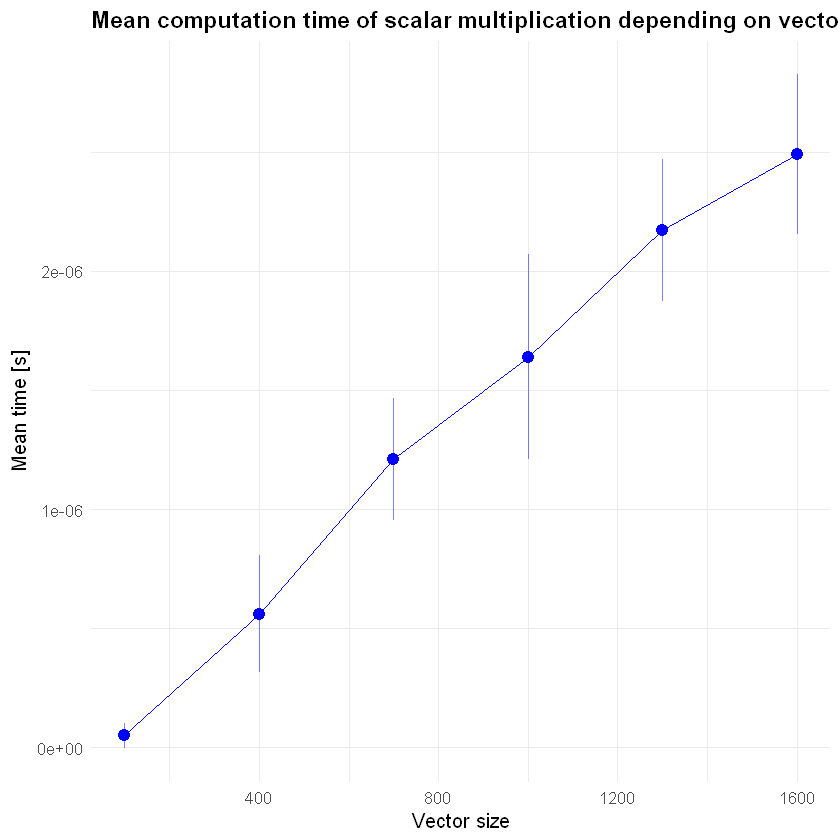

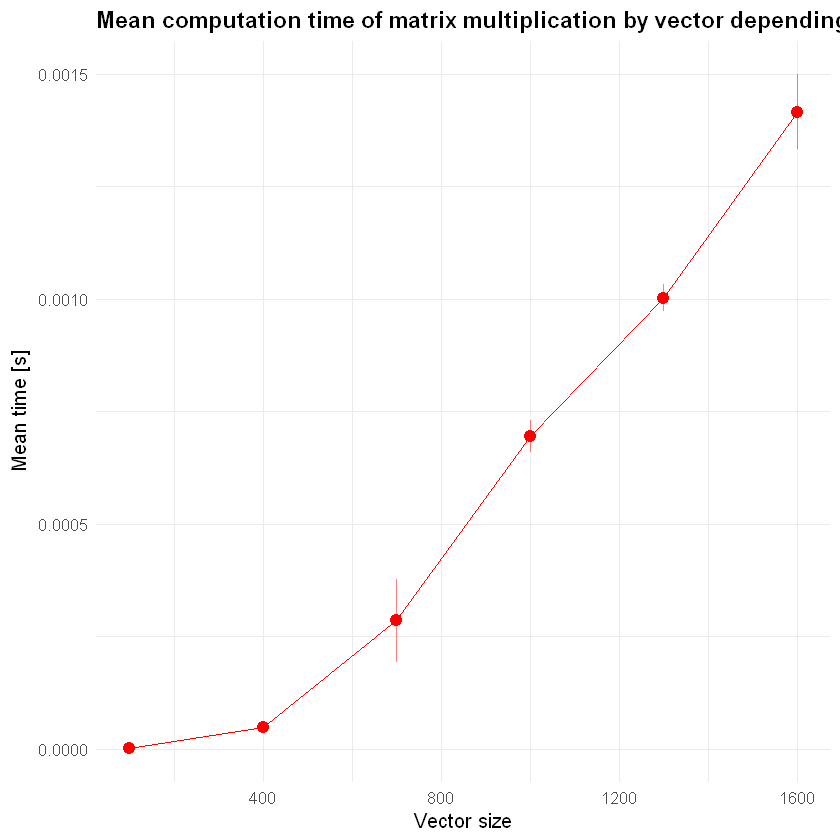

In [20]:
ggplot(results, aes(x = Size, y = scalar_mean)) +
  geom_line(color = "blue") +
  geom_errorbar(aes(ymin = scalar_mean - scalar_std, ymax = scalar_mean + scalar_std), 
                width = 0.1, color = "blue", alpha = 0.5) +
  geom_point(color = "blue", size = 3) +
  labs(title = "Mean computation time of scalar multiplication depending on vector size",
       x = "Vector size",
       y = "Mean time [s]") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.position = "none")

ggplot(results, aes(x = Size, y = matrix_mean)) +
  geom_line(color = "red") +
  geom_errorbar(aes(ymin = matrix_mean - matrix_std, ymax = matrix_mean + matrix_std), 
                width = 0.1, color = "red", alpha = 0.5) +
  geom_point(color = "red", size = 3) +
  labs(title = "Mean computation time of matrix multiplication by vector depending on size",
       x = "Vector size",
       y = "Mean time [s]") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        legend.position = "none")